# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**

El presente trabajo aborda el análisis de sentimientos aplicado a los comentarios de YouTube generados en torno a la expedición del CONICET al fondo del Cañón de Mar del Plata, Argentina. La transmisión en vivo de este evento científico despertó un alto interés en la audiencia, provocando una gran cantidad de interacciones.  

Para llevar a cabo este estudio, se **extrajeron los datos directamente desde la API de YouTube**. El código utilizado para la descarga y preprocesamiento de los comentarios se encuentra disponible en Colab: [Descargar comentarios de YouTube](https://colab.research.google.com/drive/1LE67rVEFKUGEgFjxljp5O4APZlcOzlIu?usp=drive_link).  

La motivación del proyecto radica en **comprender cómo percibe la audiencia un acontecimiento de relevancia científica y social**, y cómo estas percepciones se reflejan en los comentarios escritos en redes sociales. Este análisis resulta de interés tanto para instituciones científicas que buscan evaluar el impacto de sus comunicaciones, como para analistas de datos y profesionales de NLP interesados en el desarrollo de herramientas automáticas de procesamiento y clasificación de texto.


**Contexto Comercial y Analítico**

La creciente importancia de la divulgación científica en plataformas digitales convierte a YouTube en un canal estratégico para llegar a audiencias masivas. El CONICET, como organismo científico nacional, no solo persigue fines de investigación, sino también de comunicación y transferencia del conocimiento a la sociedad.
Desde el punto de vista analítico, los comentarios extraídos mediante la API de YouTube permiten explorar la opinión pública de manera estructurada. A través de técnicas de procesamiento de lenguaje natural y modelos de clasificación supervisada, es posible categorizar automáticamente los comentarios en términos de sentimientos, obteniendo métricas cuantitativas que complementan la evaluación cualitativa del evento.

**Preguntas/Hipótesis a Resolver**

* ¿Qué tan efectivo puede ser un modelo de aprendizaje automático para clasificar automáticamente comentarios de YouTube en este contexto?

* ¿Es posible que este tipo de análisis se utilice como métrica indirecta de impacto social en futuras campañas de divulgación científica?

**Objetivo**

El objetivo de este proyecto es desarrollar y evaluar modelos de análisis de sentimientos que permitan clasificar automáticamente los comentarios de la transmisión de la expedición del CONICET en YouTube.
De esta manera, se busca:

1. Extraer y procesar los datos textuales desde la API de YouTube.

2. Aplicar técnicas de NLP para representar los comentarios en un espacio vectorial interpretable por algoritmos de machine learning.

3. Entrenar y ajustar un modelo de clasificación supervisada, evaluando métricas de precisión, recall y F1-score.

4. Generar conclusiones sobre la percepción social de la expedición y el potencial de estas metodologías como herramienta de evaluación de impacto en la comunicación científica.

# **Lectura de datos**

**Librerias necesarias**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import spacy
import os
os.system("python -m spacy download es_core_news_sm")

0

**Configuración del entorno de Python en Google Colab**

In [51]:
#Setear el ID del archivo dentro mi G.Drive (Previo di permisos para que se pueda acceder como lector al enlace)

#el id del archivo en mi g.drive
id = "1bXFr0m1p_E1LYStM4odpCA7cs2snZfXB"

#Forma genérica de entrar al archivo en drive + el id
url = f'https://drive.google.com/uc?id={id}'

**Lectura del corpus**

In [52]:
#Head
df = pd.read_csv(url)
#Mostrar las primeras filas del DataFrame
df.head()

,video,video_id,autor,texto,likes,fecha
0,SOI Divestream 809,oqvkOMr4P0Y,@santiagoezquerramazarico557,Muchas gracias,0,2025-08-16T14:38:10Z
1,SOI Divestream 809,oqvkOMr4P0Y,@carolinamejico5314,"fana del stream, mi serie favorita; como empec...",0,2025-08-16T01:58:40Z
2,SOI Divestream 809,oqvkOMr4P0Y,@genoveS-n8k,☑Primera inmersión; reviviendo el inicio de es...,0,2025-08-14T21:25:42Z
3,SOI Divestream 809,oqvkOMr4P0Y,@loremaeg,volví al primer día! que lindo es escucharlos ...,1,2025-08-14T16:09:46Z
4,SOI Divestream 809,oqvkOMr4P0Y,@mile9285,Como los extraño tanto estoy volviendo a ver l...,3,2025-08-13T01:08:47Z


**Descripción de variables**

* **video**: nombre del video
* **video_id**: ID del video en Youtube
* **autor**: usuario que escribe el comentario en el video por usuario
* **texto**: el comentario publicado en el video
* **likes**: funciona como un contador. Es la cantidad de likes del comentario
* **fecha**: fecha en la cual fue escrito el comentario   

**Análisis inicial**

El corpus es la colección de textos a analizar, es decir, la columna texto del DataFrame.
Por lo cual:
* Corpus completo → todos los comentarios del dataset (columna texto).
* Documento → cada comentario individual (cada fila de la columna texto).

In [53]:
# Crear Corpus
corpus = df["texto"].astype(str).tolist()

# Tamaño y algunos ejemplos del corpus
print("Cantidad de comentarios en el corpus:", len(corpus))
print("\nEjemplos:")
for i, comentario in enumerate(corpus[:5]):
    print(f"{i+1}. {comentario}")


Cantidad de comentarios en el corpus: 11191

Ejemplos:
1. Muchas gracias
2. fana del stream, mi serie favorita; como empecé a verla al final, ahora veo desde la primera inmersión...💙🤍💙vamos el CONICET!!!!!!💙🤍💙
3. ☑Primera inmersión; reviviendo el inicio de esta "locura" 😉, digo "aventura"🟦⬜🟦. Y para nosotros también ahora "la noche es eterna", como escuchamos en el relato inicial sobre el talud. Mientras tanto - en este entretiempo 😪 - descubrimos las pelis "Bob esponja" con. A. Banderas y "Neverending story" con su Falkor. GRACIAS por tanto 
4. volví al primer día! que lindo es escucharlos de nuevo, tan entusiasmados cada vez que encuentran algo! Les Adoro! 🙌
5. Como los extraño tanto estoy volviendo a ver la colección completa de esta temporada hermosa, dentro del Falkor Too ❤... Me encanta ... Me encanta ... Me encanta!!!! No me canso de verlos ni de escucharlos!!!!! 😍😍😍🐚🐚🐚🪸✨
Que belleza nuestro fondo marino!!!!


**Inicializar Spacy**

In [54]:
# Inicializar Spacy y procesar el corpus
# con spacy
nlp = spacy.load("es_core_news_sm")

# Unir toda la lista en un solo string
corpus_str = " ".join(corpus)

#Procesar el corpus completo
doc = nlp(corpus_str)

# Ver los primeros tokens procesados
doc[0:10]

Muchas gracias fana del stream, mi serie favorita;

# **Análisis Exploratorio**

In [55]:
from collections import Counter
import numpy as np

## **Análisis de la Longitud de las Oraciones**

In [56]:
# Palabras
palabras_spacy = [token.text for token in doc] #todas las palabras del corpus sin filtrar alfabéticas ni otras
num_palabras_spacy = len(palabras_spacy)

# Oraciones
oraciones_spacy = list(doc.sents)
num_oraciones_spacy = len(oraciones_spacy)

print("Número de palabras (spaCy):", num_palabras_spacy)
print("Número de oraciones (spaCy):", num_oraciones_spacy)

Número de palabras (spaCy): 162818
Número de oraciones (spaCy): 9912


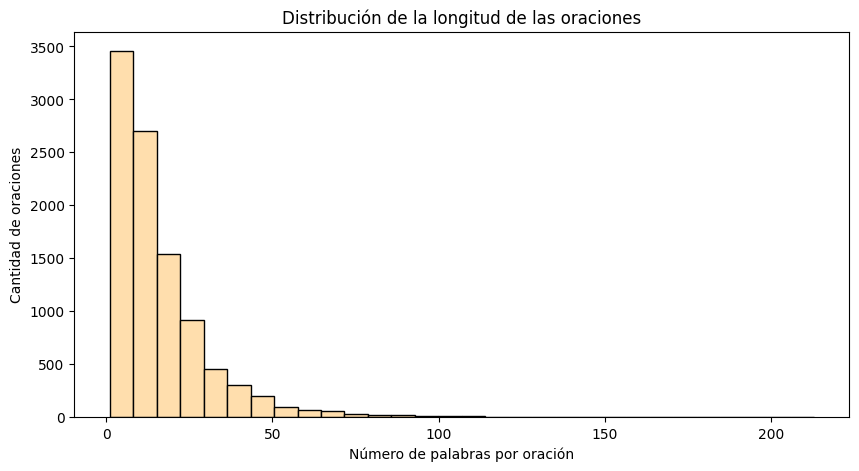

In [57]:
# longitud de cada oración (en palabras) con spaCy
longitudes_oraciones = [len([palabra for palabra in oracion]) for oracion in oraciones_spacy] #para cada oración, y para cada palabra de cada oracion, contar la cantidad de palabras de esa oracion.

plt.figure(figsize=(10,5))
plt.hist(longitudes_oraciones, bins=30, color='navajowhite', edgecolor='black')
plt.title("Distribución de la longitud de las oraciones")
plt.xlabel("Número de palabras por oración")
plt.ylabel("Cantidad de oraciones")
plt.show()

Se puede apreciar que hasta 10 palabras por oración es el predominante en aproximadamente 3400 oraciones.

##  **Análisis de la Frecuencia de Palabras**

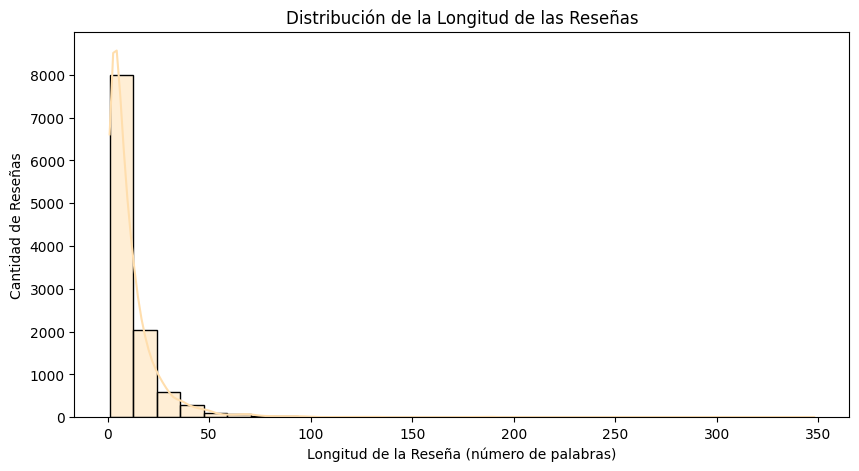

In [58]:
# Crear variable en mi DataFrame con la longitud de cada reseña
df["n_palabras"] = [len(oracion.split()) for oracion in corpus]

# Histograma
plt.figure(figsize=(10,5))
sns.histplot(df["n_palabras"], bins=30, kde=True, color='navajowhite', edgecolor='black')
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña (número de palabras)')
plt.ylabel('Cantidad de Reseñas')
plt.show()


Se puede apreciar que hasta 10 palabras por cada reseña es el predominante en alrededor de 8000 reseñas/comentarios

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


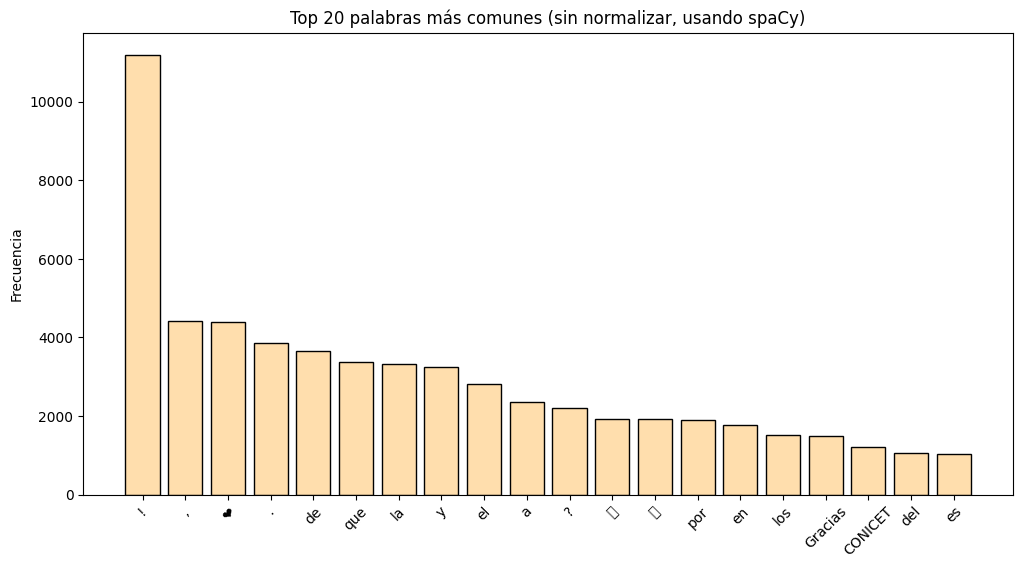

In [59]:
#Top 20 palabras más comunes (sin normalizar)

# Contar frecuencia
contador = Counter(palabras_spacy)
mas_comunes = contador.most_common(20)

# Separar palabras y frecuencias
palabras, frecuencias = zip(*mas_comunes)

# Graficar
plt.figure(figsize=(12,6))
plt.bar(palabras, frecuencias, color="navajowhite",edgecolor='black')
plt.title("Top 20 palabras más comunes (sin normalizar, usando spaCy)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


Dentro de las 20 palabras mas usadas, predominan claramente signos de puntuación y preposiciones, lo cual marca el esceneario ideal para realizar un trabajo de limpieza como punto inicial removiendo stopwords, emojis, signos de puntuación y normalizando el corpus a minúscula

In [60]:
mas_comunes

[('!', 11196),
 (',', 4410),
 ('❤', 4387),
 ('.', 3863),
 ('de', 3640),
 ('que', 3362),
 ('la', 3318),
 ('y', 3246),
 ('el', 2823),
 ('a', 2352),
 ('?', 2197),
 ('🇦', 1926),
 ('🇷', 1925),
 ('por', 1908),
 ('en', 1772),
 ('los', 1508),
 ('Gracias', 1494),
 ('CONICET', 1204),
 ('del', 1047),
 ('es', 1034)]

##  **Análisis de las Partes del Discurso (POS)**

Distribución de Partes del Discurso (POS):
PUNCT: 24052
NOUN: 23957
PROPN: 20758
VERB: 16115
DET: 15905
ADP: 15854
ADJ: 9827
PRON: 9473
NUM: 6066
ADV: 5484
AUX: 5390
CCONJ: 4393
SCONJ: 3163
INTJ: 330
SYM: 78
PART: 24
X: 1


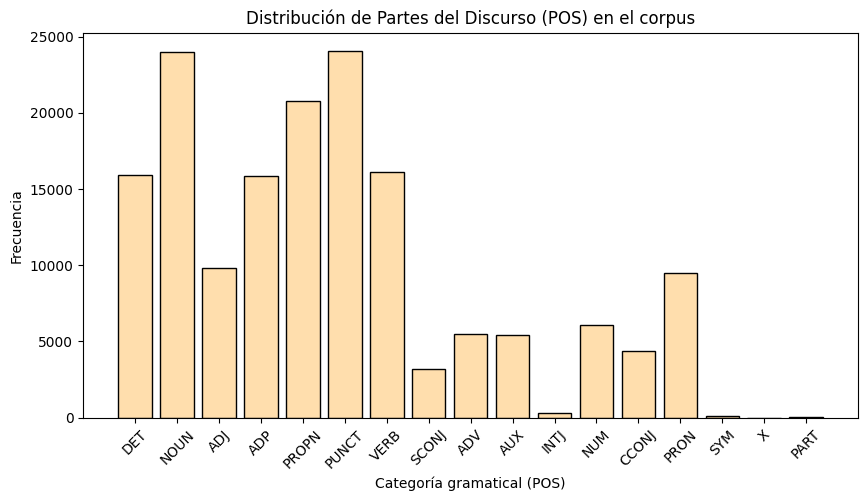

In [61]:
# Contar todas las etiquetas POS
pos_counts = Counter([token.pos_ for token in doc if not token.is_space])

# Mostrar resultados
print("Distribución de Partes del Discurso (POS):")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

# Visualización
plt.figure(figsize=(10,5))
plt.bar(pos_counts.keys(), pos_counts.values(), color="navajowhite", edgecolor='black')
plt.xticks(rotation=45)
plt.title("Distribución de Partes del Discurso (POS) en el corpus")
plt.xlabel("Categoría gramatical (POS)")
plt.ylabel("Frecuencia")
plt.show()


En concordancia con las 20 palabras más usadas, los signos de puntuación son las partes del discurso mas usadas

**Breve reseña de las Partes del Discurso (POS)**:

| POS    | Significado                  | Ejemplos en español                         |
|--------|-----------------------------|--------------------------------------------|
| PUNCT  | Signos de puntuación         | ., !, ?, ;                                 |
| NOUN   | Sustantivo común             | casa, perro, stream, serie                 |
| PROPN  | Sustantivo propio            | Mar del Plata, Santiago, SOI Divestream   |
| VERB   | Verbo principal              | comer, mirar, volver                        |
| DET    | Determinante                 | el, la, los, mis, un                       |
| ADP    | Preposición / adposición     | a, de, en, con, por                         |
| ADJ    | Adjetivo                     | bonito, lindo, favorito                     |
| PRON   | Pronombre                    | yo, tú, ellos, esto                         |
| NUM    | Número                       | uno, 3, veinte                              |
| ADV    | Adverbio                     | rápidamente, muy, hoy                       |
| AUX    | Verbo auxiliar               | haber, ser, estar                           |
| CCONJ  | Conjunción coordinante       | y, o, pero                                  |
| SCONJ  | Conjunción subordinante      | que, aunque, porque                          |
| INTJ   | Interjección                 | ¡hola!, uff!, ay!                            |
| SYM    | Símbolo                      | %, $, @                                     |
| PART   | Partícula                    | no, se (como partícula reflexiva)           |
| X      | Otras / desconocidas         | tokens raros, errores o extranjerismos      |


## **Análisis de la Distribución de Longitud de Palabras**

Número total de palabras alfabéticas: 120382
Longitud promedio de palabra: 5 2
Longitud mediana de palabra: 4.0
Palabra más corta: 1
Palabra más larga: 58


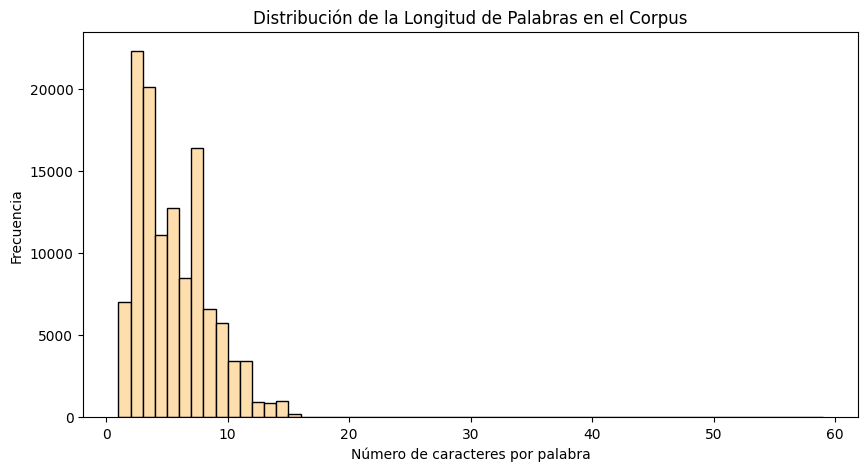

In [62]:
# Longitud de cada palabra en caracteres (solo tokens alfabéticos)
long_palabras = [len(token.text) for token in doc if token.is_alpha]

# Estadísticas
print("Número total de palabras alfabéticas:", len(long_palabras))
print("Longitud promedio de palabra:", round(np.mean(long_palabras)), 2)
print("Longitud mediana de palabra:", np.median(long_palabras))
print("Palabra más corta:", min(long_palabras))
print("Palabra más larga:", max(long_palabras))

# Histograma
plt.figure(figsize=(10,5))
plt.hist(long_palabras, bins=range(1, max(long_palabras)+2), color="navajowhite", edgecolor="black")
plt.title("Distribución de la Longitud de Palabras en el Corpus")
plt.xlabel("Número de caracteres por palabra")
plt.ylabel("Frecuencia")
plt.show()


##  **Análisis de N-gramas**

In [63]:
#Para el análisis de ngramas se utilizará ntlk, que ya cuenta con la función n-gramas
import nltk

In [64]:
# Tokenizar palabras alfabéticas en minúscula
tokens = [token.text.lower() for token in doc if token.is_alpha]

# Función para obtener n-gramas
def get_ngrams(tokens, n=2):
    return list(nltk.ngrams(tokens, n))

# Bigrams (n=2)
bigrams = get_ngrams(tokens, 2)
contador_bigrams = Counter(bigrams)
print("Top 20 bigrams más frecuentes:")
for bg, freq in contador_bigrams.most_common(20):
    print(f"{bg}: {freq}")

# Trigrams (n=3)
trigrams = get_ngrams(tokens, 3)
contador_trigrams = Counter(trigrams)
print("\nTop 20 trigrams más frecuentes:")
for tg, freq in contador_trigrams.most_common(20):
    print(f"{tg}: {freq}")



Top 20 bigrams más frecuentes:
('gracias', 'por'): 947
('el', 'conicet'): 813
('la', 'ciencia'): 745
('lo', 'que'): 492
('de', 'la'): 457
('aguante', 'el'): 452
('ciencia', 'argentina'): 321
('a', 'la'): 309
('en', 'el'): 299
('y', 'la'): 254
('gracias', 'conicet'): 247
('del', 'conicet'): 244
('conicet', 'y'): 237
('aguante', 'la'): 235
('en', 'vivo'): 232
('gracias', 'gracias'): 218
('los', 'científicos'): 213
('en', 'la'): 210
('gracias', 'a'): 206
('a', 'todos'): 206

Top 20 trigrams más frecuentes:
('aguante', 'el', 'conicet'): 421
('la', 'ciencia', 'argentina'): 291
('aguante', 'la', 'ciencia'): 180
('gracias', 'por', 'compartir'): 158
('el', 'conicet', 'y'): 140
('todo', 'lo', 'que'): 136
('la', 'ciencia', 'y'): 124
('fondo', 'del', 'mar'): 123
('viva', 'el', 'conicet'): 118
('gracias', 'por', 'todo'): 104
('viva', 'la', 'ciencia'): 104
('lo', 'que', 'hacen'): 101
('el', 'fondo', 'del'): 94
('muchas', 'gracias', 'por'): 91
('mar', 'del', 'plata'): 79
('gracias', 'gracias', 'grac

## **Análisis de la Diversidad Léxica**

La **diversidad léxica** mide qué tan **rico es el vocabulario** en tus comentarios.  
Se calcula con la siguiente fórmula:

$$
\text{Diversidad léxica} = \dfrac{\text{Número de palabras únicas}}{\text{Número total de palabras}}
$$


Un valor cercano a 1 significa que casi todas las palabras son distintas, y un valor cercano a 0 indica que hay muchas repeticiones.

In [65]:
# Calcular diversidad léxica
def lexical_diversity(doc):
    palabras = [token.text.lower() for token in doc if token.is_alpha]  # solo palabras alfabéticas
    total_palabras = len(palabras)
    palabras_unicas = len(set(palabras))
    return palabras_unicas / total_palabras if total_palabras > 0 else 0

# diversidad léxica
diversidad_total = lexical_diversity(doc)
print("Diversidad Léxica del corpus:", round(diversidad_total, 3))


Diversidad Léxica del corpus: 0.098


Este valor de 0.098 ≈ 10% significa que aproximadamente 1 de cada 10 palabras es única, lo cual es razonable para un corpus de reseñas o comentarios.

## **Visualización de Palabras con Word Cloud (en estado crudo)**

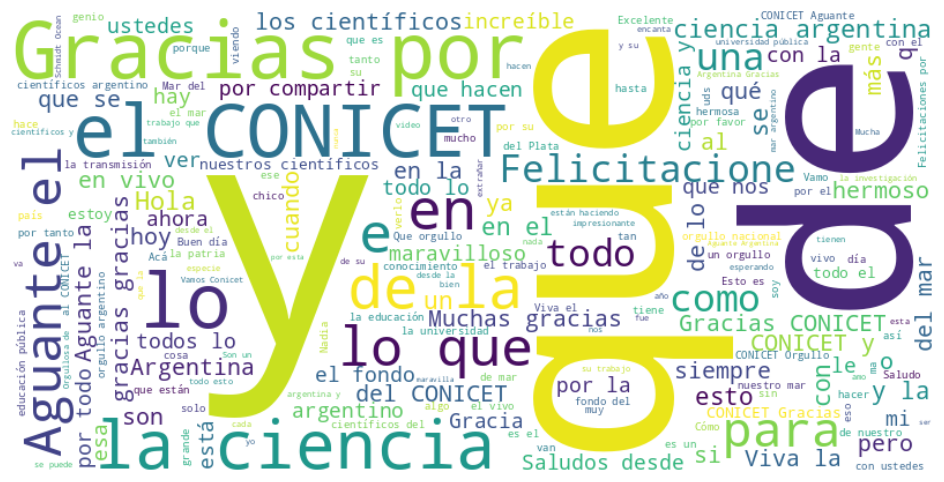

In [66]:
# Generar WordCloud a partir del texto crudo
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(corpus_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


##  **Conclusiones del Analisis exploratorio**

### **Volumen y estructura del corpus**

- **Número total de palabras:** 162.818  
- **Número total de palabras alfabéticas:** 120.382  
- **Número total de oraciones:** 9.912  
- **Longitud promedio de palabra:** 5.2 caracteres  
- **Longitud mediana de palabra:** 4 caracteres  
- **Palabra más corta:** 1 carácter  
- **Palabra más larga:** 58 caracteres  

> ➝ Se observa un corpus grande, expresivo y con variedad en la longitud de las palabras.

### **Frecuencias léxicas**

- Top 20 palabras más frecuentes incluyen gran cantidad de signos de puntuación (`!`, `,`, `?`, `❤`, banderas), junto con stopwords comunes (`de`, `que`, `la`, `y`).  
- También aparecen entidades y expresiones relevantes como **“Gracias”** y **“CONICET”**.  

> ➝ Esto confirma el tono emocional y el foco temático en ciencia/CONICET.

### **Distribución de Partes del Discurso (POS tagging)**

- **Sustantivos (NOUN + PROPN):** 44.715 → 27% del total  
- **Verbos:** 16.115 → reflejan acción y narración  
- **Adjetivos + Adverbios:** 15.311 → aportan matices y valoración  
- **Puntuación (PUNCT):** 24.052 → confirma uso intensivo de emojis, exclamaciones y símbolos  

> ➝ El corpus combina informalidad, expresividad emocional y lenguaje técnico.

### **N-gramas**

- **Bigrams más frecuentes:** destacan expresiones como  
  - “gracias por” (947)  
  - “el conicet” (813)  
  - “la ciencia” (745)  
  - “aguante el” (452)  
- **Trigrams más frecuentes:** aparecen construcciones como  
  - “aguante el conicet” (421)  
  - “la ciencia argentina” (291)  
  - “gracias por compartir” (158)  
  - “viva el conicet” (118)  

> ➝ Los n-gramas reflejan un alto grado de agradecimiento, valoración de la ciencia y apoyo explícito al CONICET y la educación pública.

### **Hallazgos claves para la limpieza**

- Normalizar casos (ej. “Gracias” vs. “gracias”).  
- Definir tratamiento de emojis, símbolos y puntuación: pueden ser ruido o un insumo valioso para análisis de sentimientos.  
- Filtrar stopwords para centrarse en contenido semántico.  
- Revisar palabras largas y tokens anómalos (posibles errores de escritura).


# **Preprocesamiento del Texto**

## **Tokenizar**

Dado que estoy trabajando con Spacy, ya lo hace automáticamente, pero creare columnas nuevas en el DataFrame para guardar resultados por reseña

In [67]:
# A cada reseña le voy a crear una columna nueva con el texto tokenizado
# En un bucle for debo reconcer e iniciar nlp para cada reseña
df['tokens'] = df['texto'].fillna("").apply(lambda x: [token.text for token in nlp(str(x))])

df[['texto','tokens']].head()

,texto,tokens
0,Muchas gracias,"[Muchas, gracias]"
1,"fana del stream, mi serie favorita; como empec...","[fana, del, stream, ,, mi, serie, favorita, ;,..."
2,☑Primera inmersión; reviviendo el inicio de es...,"[☑, Primera, inmersión, ;, reviviendo, el, ini..."
3,volví al primer día! que lindo es escucharlos ...,"[volví, al, primer, día, !, que, lindo, es, es..."
4,Como los extraño tanto estoy volviendo a ver l...,"[Como, los, extraño, tanto, estoy, volviendo, ..."


## **Limpieza del Texto**

* Convertir a minúsculas
* Eliminar signos de puntuación y símbolos innecesarios
* Eliminar números si no aportan valor
* Eliminar stopwords (palabras vacías como “de”, “que”, “la”) (token.is_stop de Spacy)
* Lematizar (token.lemma_ de Spacy)

In [68]:
df['tokens_limpios'] = df['texto'].fillna("").apply(lambda x: [token.lemma_.lower()
                                                    for token in nlp(x)
                                                    if token.is_alpha and not token.is_stop])
df[['texto','tokens','tokens_limpios']].head()

,texto,tokens,tokens_limpios
0,Muchas gracias,"[Muchas, gracias]",[gracia]
1,"fana del stream, mi serie favorita; como empec...","[fana, del, stream, ,, mi, serie, favorita, ;,...","[fán, stream, serie, favoritar, empezar, ver é..."
2,☑Primera inmersión; reviviendo el inicio de es...,"[☑, Primera, inmersión, ;, reviviendo, el, ini...","[inmersión, reviveir, inicio, locura, decir, n..."
3,volví al primer día! que lindo es escucharlos ...,"[volví, al, primer, día, !, que, lindo, es, es...","[volví, lindo, escucharlo, entusiasmado, encon..."
4,Como los extraño tanto estoy volviendo a ver l...,"[Como, los, extraño, tanto, estoy, volviendo, ...","[extraño, volver, colección, completo, tempora..."


## **Definir e instanciar nuevo corpus preprocesado**

In [69]:
corpus_limpio = df['tokens_limpios'].apply(lambda x: " ".join(x)).tolist()

# Unir todas las reseñas limpias en un solo string
corpus_limpio_str = " ".join(corpus_limpio)

# Procesar con spaCy
doc_limpio = nlp(corpus_limpio_str)

# Ver los primeros tokens procesados
doc_limpio[0:10]

gracia fán stream serie favoritar empezar ver él ver inmersión

## **Partes del Discurso (POS) nuevo corpus preprocesado y Diversidad Léxica**

In [70]:
# Contar POS
pos_counts = Counter([token.pos_ for token in doc_limpio])

# Mostrar resultados
print("Distribución de POS en el corpus limpio:")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")


Distribución de POS en el corpus limpio:
NOUN: 17742
ADJ: 14650
VERB: 13023
PROPN: 7770
ADP: 1659
ADV: 1001
SPACE: 875
PRON: 701
AUX: 660
DET: 320
CCONJ: 308
NUM: 156
INTJ: 74
SCONJ: 72
PART: 3
SYM: 3
PUNCT: 2
X: 1


Al comparar la distribución de POS **antes y después de la limpieza**, se observa que:

- En el **corpus crudo**, los signos de puntuación (PUNCT), determinantes (DET) y stopwords como preposiciones (ADP) y pronombres (PRON) dominaban gran parte del texto.
- Tras la limpieza y lematización, el **corpus limpio** está concentrado principalmente en **sustantivos (NOUN), adjetivos (ADJ), verbos (VERB) y nombres propios (PROPN)**, mientras que la puntuación y tokens irrelevantes prácticamente desaparecen.

> Esto confirma que la limpieza permite enfocarse en las palabras **más significativas** para análisis semántico y de sentimiento.

In [71]:
diversidad_total_prepo = lexical_diversity(doc_limpio)
print("Diversidad Léxica del corpus preprocesado:", round(diversidad_total_prepo, 3))

Diversidad Léxica del corpus preprocesado: 0.164


**Diversidad Léxica**

- **Corpus crudo:** Diversidad léxica de **0.098**, indicando que muchas palabras se repiten debido a stopwords, puntuación y símbolos.  
- **Corpus preprocesado:** Diversidad léxica aumenta a **0.164**, mostrando que tras la limpieza y lematización, el texto contiene **una mayor proporción de palabras significativas y únicas**.

> La limpieza del corpus mejora la riqueza léxica relativa, facilitando análisis semánticos más precisos.


## **Visualización de Palabras con Word Cloud (preprocesado)**

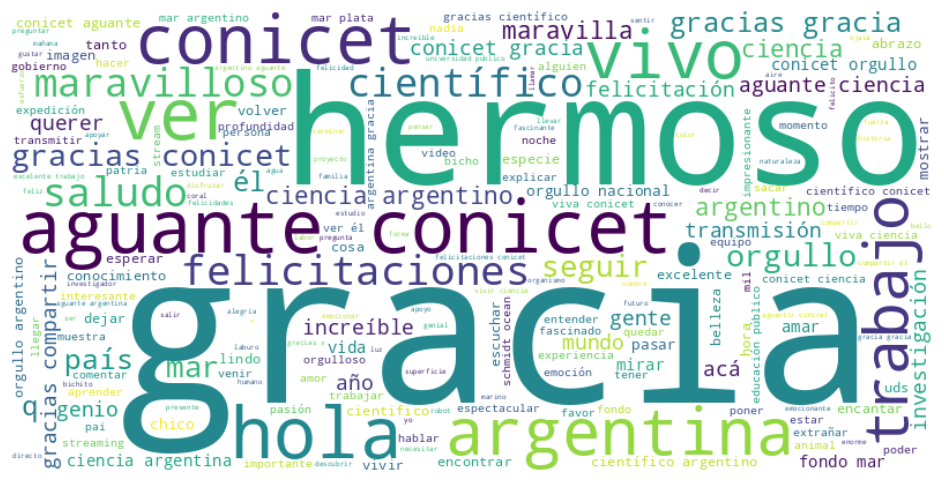

In [72]:
# Generar WordCloud a partir del texto crudo
wordcloud_prepo = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(corpus_limpio_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_prepo, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Análisis Pragmático**

Dado que el dataset no tiene etiquetas de sentimiento, lo ideal es usar un modelo transformes adaptado al español.

El mas interesante me resulto BETO (adaptado de BERT (en íngles) de Hugging Face:) para español

Este modelo detecta si un comentario es positivo, negativo o neutral

Disponible en: https://huggingface.co/finiteautomata/beto-sentiment-analysis

El resultados son etiquetas POS(positivo), NEG(negativo), NEU(neutral)

In [73]:
from transformers import pipeline

# Pipeline de sentimiento (multilingüe)
sentiment_analyzer = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")

# Analizar los primeros comentarios del corpus limpio
resultados = sentiment_analyzer(corpus_limpio[:5])

for texto, res in zip(corpus_limpio[:5], resultados):
    print(f"Comentario: {texto}\nSentimiento: {res}\n")


Device set to use cuda:0


Comentario: gracia
Sentimiento: {'label': 'POS', 'score': 0.9982926249504089}

Comentario: fán stream serie favoritar empezar ver él ver inmersión
Sentimiento: {'label': 'POS', 'score': 0.9874918460845947}

Comentario: inmersión reviveir inicio locura decir noche eterno escuchar relato inicial talud entretiempo descubrir peli bob esponja banderas neverending story falkor gracias
Sentimiento: {'label': 'NEU', 'score': 0.9477487802505493}

Comentario: volví lindo escucharlo entusiasmado encontrar adorar
Sentimiento: {'label': 'POS', 'score': 0.9981208443641663}

Comentario: extraño volver colección completo temporada hermoso falkor too encantar encantar encantar canso verlo escucharlo bellezar fondo marino
Sentimiento: {'label': 'POS', 'score': 0.9963907599449158}



Visto como funciona BETO, añadire al dataframe, columnas de sentimiento y su score, de procesar cada comentario limpio.

In [74]:
# Cargar pipeline BETO
sentiment_analyzer = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")

# Crear columna sentimiento y score a partir de tokens_limpios
df["sentimiento"] = None
df["score"] = None

# Procesar fila por fila
for idx, row in df.iterrows():
    texto_procesado = " ".join(row["tokens_limpios"])
    resultado = sentiment_analyzer(texto_procesado)[0]

    df.at[idx, "sentimiento"] = resultado["label"]
    df.at[idx, "score"] = resultado["score"]


Device set to use cuda:0


In [75]:
#mostrar DF final con todas sus incoporaciones
df.head()

,video,video_id,autor,texto,likes,fecha,n_palabras,tokens,tokens_limpios,sentimiento,score
0,SOI Divestream 809,oqvkOMr4P0Y,@santiagoezquerramazarico557,Muchas gracias,0,2025-08-16T14:38:10Z,2,"[Muchas, gracias]",[gracia],POS,0.998293
1,SOI Divestream 809,oqvkOMr4P0Y,@carolinamejico5314,"fana del stream, mi serie favorita; como empec...",0,2025-08-16T01:58:40Z,20,"[fana, del, stream, ,, mi, serie, favorita, ;,...","[fán, stream, serie, favoritar, empezar, ver é...",POS,0.987492
2,SOI Divestream 809,oqvkOMr4P0Y,@genoveS-n8k,☑Primera inmersión; reviviendo el inicio de es...,0,2025-08-14T21:25:42Z,54,"[☑, Primera, inmersión, ;, reviviendo, el, ini...","[inmersión, reviveir, inicio, locura, decir, n...",NEU,0.947749
3,SOI Divestream 809,oqvkOMr4P0Y,@loremaeg,volví al primer día! que lindo es escucharlos ...,1,2025-08-14T16:09:46Z,20,"[volví, al, primer, día, !, que, lindo, es, es...","[volví, lindo, escucharlo, entusiasmado, encon...",POS,0.998121
4,SOI Divestream 809,oqvkOMr4P0Y,@mile9285,Como los extraño tanto estoy volviendo a ver l...,3,2025-08-13T01:08:47Z,42,"[Como, los, extraño, tanto, estoy, volviendo, ...","[extraño, volver, colección, completo, tempora...",POS,0.996391


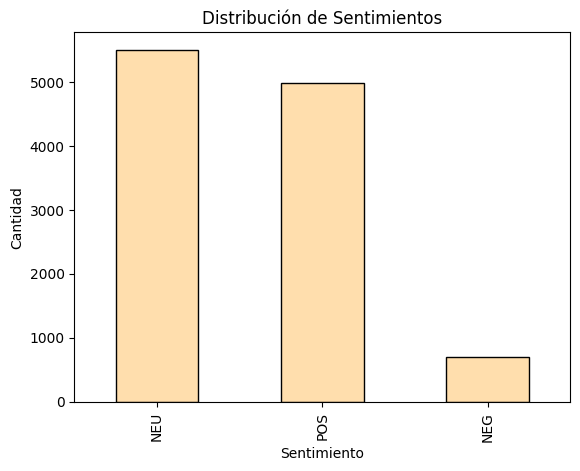

sentimiento
NEU    5502
POS    4991
NEG     698
Name: count, dtype: int64


In [76]:
#Distribución de sentimientos
df["sentimiento"].value_counts().plot(kind="bar",color="navajowhite", edgecolor="black")

plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()

print(df["sentimiento"].value_counts())

Podemos apreciar claramente un problema de desbalanceo entre las clases.
Dado que el foco esta puesto en detectar si el comentario es positivo o no, se convertirá en un problema de clasificación binario en la etapa siguiente

# **Modelo de clasificación simple usando TF-IDF**

**Librerias necesarias para implementar los modelos**

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Preparar la columna sentimiento**

In [78]:
#Convertir en un problema binario (POS vs NO_POS)
df["sentimiento_bin"] = df["sentimiento"].map(
    lambda x: "POS" if x == "POS" else "NO_POS"
)

print(df["sentimiento_bin"].value_counts())


sentimiento_bin
NO_POS    6200
POS       4991
Name: count, dtype: int64


In [79]:
# Label encoder
le = LabelEncoder()
df["sentimiento_label"] = le.fit_transform(df["sentimiento_bin"])
print(dict(zip(le.classes_, le.transform(le.classes_))))
print(df[["sentimiento_bin", "sentimiento_label"]].head())



{'NO_POS': np.int64(0), 'POS': np.int64(1)}
  sentimiento_bin  sentimiento_label
0             POS                  1
1             POS                  1
2          NO_POS                  0
3             POS                  1
4             POS                  1


**Feature Selection con TF-IDF**

In [80]:
# Inicializamos TF-IDF
vectorizer = TfidfVectorizer()

# Ajustamos y transformamos el corpus limpio a matriz de características
X = vectorizer.fit_transform(corpus_limpio)

# Definir variable objetivo
y = df["sentimiento_label"]

**División de datos en conjuntos de entrenamiento y prueba**

In [81]:
#Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

**Entrenar un modelo**

In [82]:
modelo_lg= LogisticRegression(max_iter=200)
modelo_lg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

**Predicción con conjunto de prueba y Evaluación del rendimiento del modelo****

In [83]:
y_pred = modelo_lg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      NO_POS       0.86      0.95      0.91      1272
         POS       0.93      0.80      0.86       967

    accuracy                           0.89      2239
   macro avg       0.90      0.88      0.88      2239
weighted avg       0.89      0.89      0.89      2239



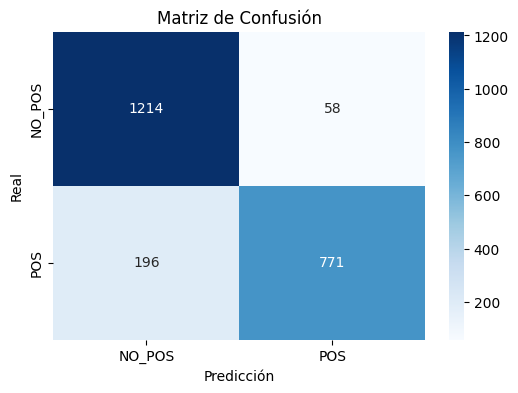

In [84]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

**Conclusión sobre el modelado y las metricas**

El modelo de Regresión Logística alcanzó una exactitud (accuracy) del 89%, lo que indica un buen desempeño general en la tarea de clasificación.

* Para la clase NO_POS (negativa), el modelo mostró un recall alto (0.95), lo que significa que logra identificar correctamente la mayoría de los casos negativos. La precisión (0.86) es ligeramente más baja, indicando que algunos casos positivos se clasificaron erróneamente como negativos.

* Para la clase POS (positiva), el modelo logró una precisión muy alta (0.93), es decir, cuando predice que algo es positivo suele acertar. Sin embargo, el recall (0.80) es más bajo, lo que revela que aún se pierden algunos positivos que son clasificados como negativos.

# **Optimización de modelos**

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import time

In [86]:
# iniciar el conteo de tiempo
tiempo_inicio = time.time()

# Definir la grilla de búsqueda
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['saga'],
    # l1_ratio solo se usa si penalty='elasticnet'
    'l1_ratio': [0.25, 0.5, 0.75],
    "max_iter": [200, 300, 500]
}

# Configurar el RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=200),
    param_distributions=param_dist,
    n_iter=50,          # combinaciones a probar
    scoring='f1',       # métrica principal para optimizar
    cv=5,               # validación cruzada
    verbose=1,
    n_jobs=-1,
    random_state=24
)

# Entrenar
random_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor score de validación:", random_search.best_score_)

#Tiempos
tiempo_fin = time.time()
tiempo = tiempo_fin - tiempo_inicio
print(f"Tiempo de ejecución: {tiempo / 60:.2f} minutos")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 200, 'l1_ratio': 0.5, 'C': np.float64(10.0)}
Mejor score de validación: 0.8728984505861099
Tiempo de ejecución: 15.06 minutos


In [87]:
#entrar los mejores parámetros
mejor_modelo = LogisticRegression(
    solver='saga',
    penalty='elasticnet',
    C=10.0,
    max_iter=200,
    l1_ratio=0.50
)

#entrenar el mejor modelo
mejor_modelo.fit(X_train, y_train)

# predicciones
y_pred_mejor = mejor_modelo.predict(X_test)

#reporte de clasificación
print(classification_report(y_test, y_pred_mejor, target_names=le.classes_))

              precision    recall  f1-score   support

      NO_POS       0.89      0.95      0.92      1272
         POS       0.93      0.84      0.88       967

    accuracy                           0.90      2239
   macro avg       0.91      0.90      0.90      2239
weighted avg       0.90      0.90      0.90      2239



**Conclusión sobre la optimización**

Tras optimizar los hiperparámetros con `RandomizedSearchCV`, el modelo de regresión logística mejoró su desempeño frente a la configuración inicial (`max_iter=200`).  
Los mejores parámetros fueron: `solver='saga'`, `penalty='elasticnet'`, `C=10.0`, `max_iter=200`, `l1_ratio=0.50`.  

- F1-score POS: 0.86 → 0.88  
- F1-score NO_POS: 0.91 → 0.92  
- Accuracy global: 0.89 → 0.90  

La optimización permitió un mejor equilibrio entre precisión y recall, aumentando la capacidad predictiva sin sacrificar estabilidad.


**Probar el modelo**

In [88]:
# Lista de comentarios de prueba
comentarios_conicet = [
    "Impresionante el trabajo del CONICET, es un orgullo nacional.",
    "No le veo sentido gastar tantos recursos en una expedición así.",
    "Qué increíble hallazgo, nunca pensé que el fondo marino de Mar del Plata tuviera tanta biodiversidad.",
    "Esto es puro marketing, no creo que aporte nada concreto.",
    "Excelente iniciativa para conocer mejor nuestros mares.",
    "Muy poca difusión, deberían comunicar mejor estos logros científicos.",
    "El esfuerzo de los investigadores merece todo mi respeto.",
    "Me parece un despilfarro de dinero público.",
    "Fascinante ver cómo la ciencia argentina explora territorios inexplorados.",
    "No me interesa en lo más mínimo este tipo de investigaciones.",
    "Qué orgullo que haya científicos argentinos liderando este tipo de misiones.",
    "Otra excusa para gastar en algo que no va a mejorar la vida de la gente.",
    "Un gran paso para el conocimiento del ecosistema marino.",
    "Demasiada burocracia en estos proyectos, seguro tardan años en publicar resultados.",
    "Me encanta que el país apueste por la investigación marina.",
    "Lo único que veo son fotos lindas, ¿pero cuál es el beneficio real?",
    "Increíble aporte al estudio de la vida submarina.",
    "No entiendo por qué esto es relevante, deberían enfocarse en problemas más urgentes.",
    "Qué emocionante que se descubran nuevas especies.",
    "Dudo que tenga un impacto positivo en la sociedad."
]

# Transformar los comentarios con el mismo vectorizador
X_prueba = vectorizer.transform(comentarios_conicet)

# Predecir con el mejor modelo
predicciones = mejor_modelo.predict(X_prueba)

# Mostrar resultados
for comentario, pred in zip(comentarios_conicet, predicciones):
    print(f"Comentario: {comentario}\nPredicción: {pred}\n")


Comentario: Impresionante el trabajo del CONICET, es un orgullo nacional.
Predicción: 1

Comentario: No le veo sentido gastar tantos recursos en una expedición así.
Predicción: 0

Comentario: Qué increíble hallazgo, nunca pensé que el fondo marino de Mar del Plata tuviera tanta biodiversidad.
Predicción: 1

Comentario: Esto es puro marketing, no creo que aporte nada concreto.
Predicción: 0

Comentario: Excelente iniciativa para conocer mejor nuestros mares.
Predicción: 1

Comentario: Muy poca difusión, deberían comunicar mejor estos logros científicos.
Predicción: 0

Comentario: El esfuerzo de los investigadores merece todo mi respeto.
Predicción: 0

Comentario: Me parece un despilfarro de dinero público.
Predicción: 0

Comentario: Fascinante ver cómo la ciencia argentina explora territorios inexplorados.
Predicción: 1

Comentario: No me interesa en lo más mínimo este tipo de investigaciones.
Predicción: 0

Comentario: Qué orgullo que haya científicos argentinos liderando este tipo de 

# **Modelo Red Neuronal**

## **Librerias necesarias para red neuronal**

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


## **Definición del problema**

En línea con el objetivo general del proyecto, que consiste en desarrollar y evaluar modelos de análisis de sentimientos para clasificar automáticamente los comentarios de la transmisión de la expedición del CONICET en YouTube, se implementó también una red neuronal densa (MLP) como alternativa al modelo de regresión logística.

Dado que el preprocesamiento y la representación vectorial de los comentarios mediante TF-IDF ya fueron definidos previamente, estos vectores se emplearon directamente como variables de entrada (X), mientras que la variable de salida (y) corresponde a la etiqueta binaria de sentimiento: POS (positivo) y NO_POS (negativo/neutro agrupados).

La elección de una red densa se fundamenta en que los vectores TF-IDF ya contienen las características extraídas del texto. De esta forma, el MLP permite explorar la capacidad de un modelo más flexible y no lineal para capturar patrones en los datos y compararlos con los resultados obtenidos mediante enfoques clásicos de machine learning.

In [90]:
#Recordar como esta definido X e Y a lo largo del notebook:

#---------------X-----------------
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus_limpio)

#---------------y-----------------
# y = df["sentimiento_label"]

# Recordar train test split ( en apartado División de datos en conjuntos de entrenamiento y prueba):
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


## **Diseño de la red neuronal**

El modelo implementado corresponde a una red neuronal densa (MLP) compuesta por 2 capas ocultas y una capa de salida.

* **Capas y neuronas:**

  * Primera capa oculta con 128 neuronas y función de activación ReLU, que recibe como entrada el vector TF-IDF de cada comentario.

  * Segunda capa oculta con 64 neuronas y función de activación ReLU.

  * Capa de salida con 1 neurona y función de activación sigmoide, adecuada para un problema de clasificación binaria.

* **Regularización:**
Se incorporaron capas Dropout (0.3) después de cada capa oculta, con el fin de reducir el riesgo de sobreajuste.

* Todas las capas están conectadas de forma densa

* Se utilizó como función de pérdida la entropía cruzada binaria (binary cross-entropy)

* Como optimizador se seleccionó Adam

In [95]:
#definir modelo (red neuronal densa)
red_densa = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# compilar
red_densa.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## **Entrenamiento del modelo**

In [96]:
# Entrenar
history = red_densa.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 189s 667ms/step - accuracy: 0.7367 - loss: 0.5420 - val_accuracy: 0.8973 - val_loss: 0.2592
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 117s 370ms/step - accuracy: 0.9323 - loss: 0.1846 - val_accuracy: 0.8982 - val_loss: 0.2621
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 61s 74ms/step - accuracy: 0.9693 - loss: 0.0910 - val_accuracy: 0.8901 - val_loss: 0.3041
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.9817 - loss: 0.0516 - val_accuracy: 0.8937 - val_loss: 0.3417
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.9877 - loss: 0.0363 - val_accuracy: 0.8924 - val_loss: 0.3956
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.9903 - loss: 0.0285 - val_accuracy: 0.8861 - val_loss: 0.4209
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9906 - loss: 0.0241 - val_accuracy: 0.8919 - val_loss: 0.4614
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9931 - loss: 0.0185 

## **Validación y ajuste**

In [97]:
# Evaluar
loss, acc = red_densa.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en test: {acc:.2f}")

Accuracy en test: 0.90


## **Evaluación del modelo**

In [98]:
# Prueba del modelo
# para la prueba de modelo se usara "X_prueba" que ya fue usado en la prueba de la regresión logistica y se encuentra vectorizado con tfidf

# Predecir con la red neuronal
predicciones = red_densa.predict(X_prueba)

# Convertir a etiquetas (0 = negativo, 1 = positivo)
predicciones_binarias = (predicciones > 0.5).astype(int)

for comentario, pred in zip(comentarios_conicet, predicciones_binarias):
    print(f"{comentario} --> {'POSITIVO' if pred==1 else 'NO POSITIVO'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Impresionante el trabajo del CONICET, es un orgullo nacional. --> POSITIVO
No le veo sentido gastar tantos recursos en una expedición así. --> NO POSITIVO
Qué increíble hallazgo, nunca pensé que el fondo marino de Mar del Plata tuviera tanta biodiversidad. --> POSITIVO
Esto es puro marketing, no creo que aporte nada concreto. --> NO POSITIVO
Excelente iniciativa para conocer mejor nuestros mares. --> POSITIVO
Muy poca difusión, deberían comunicar mejor estos logros científicos. --> NO POSITIVO
El esfuerzo de los investigadores merece todo mi respeto. --> POSITIVO
Me parece un despilfarro de dinero público. --> NO POSITIVO
Fascinante ver cómo la ciencia argentina explora territorios inexplorados. --> POSITIVO
No me interesa en lo más mínimo este tipo de investigaciones. --> NO POSITIVO
Qué orgullo que haya científicos argentinos liderando este tipo de misiones. --> POSITIVO
Otra excusa para gastar en algo que no va a mejorar la vida de la gente. --

## **Visualización de resultados**

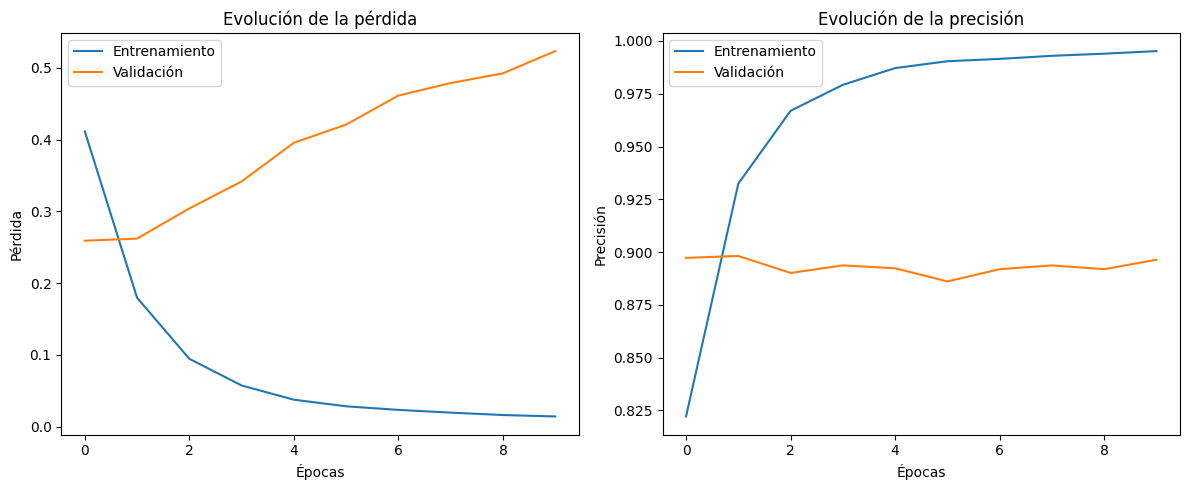

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Evolución de la pérdida ---
axes[0].plot(history.history['loss'], label='Entrenamiento')
axes[0].plot(history.history['val_loss'], label='Validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Pérdida')
axes[0].legend()
axes[0].set_title('Evolución de la pérdida')

# --- Evolución de la precisión ---
axes[1].plot(history.history['accuracy'], label='Entrenamiento')
axes[1].plot(history.history['val_accuracy'], label='Validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Precisión')
axes[1].legend()
axes[1].set_title('Evolución de la precisión')

plt.tight_layout()
plt.show()

## **Optimizar red neuronal**

Podemos apreciar en los gráficos anteriores que existe sobreajuste

* **Análisis de la Evolución de la Precisión:** la precisión del conjunto de entrenamiento (azul) aumenta y se acerca al 100%. En contraste, la precisión del conjunto de validación (naranja) se estanca alrededor del 90% y no mejora

* **Análisis de la Evolución de la Pérdida:** la curva de entrenamiento (azul) disminuye consistentemente, lo que indica que el modelo está aprendiendo bien de los datos de entrenamiento. Sin embargo, la curva de validación (naranja) aumenta de forma constante, lo que significa que la capacidad del modelo para generalizar a nuevos datos está empeorando con cada época

* Por ello una posible mejora , seria probar disminuir el número de neuronas por capa y entrenar con menos épocas

Epoch 1/2
280/280 ━━━━━━━━━━━━━━━━━━━━ 190s 670ms/step - accuracy: 0.7070 - loss: 0.5805 - val_accuracy: 0.8986 - val_loss: 0.2675
Epoch 2/2
280/280 ━━━━━━━━━━━━━━━━━━━━ 47s 122ms/step - accuracy: 0.9198 - loss: 0.2112 - val_accuracy: 0.8986 - val_loss: 0.2581
Accuracy en test: 0.90


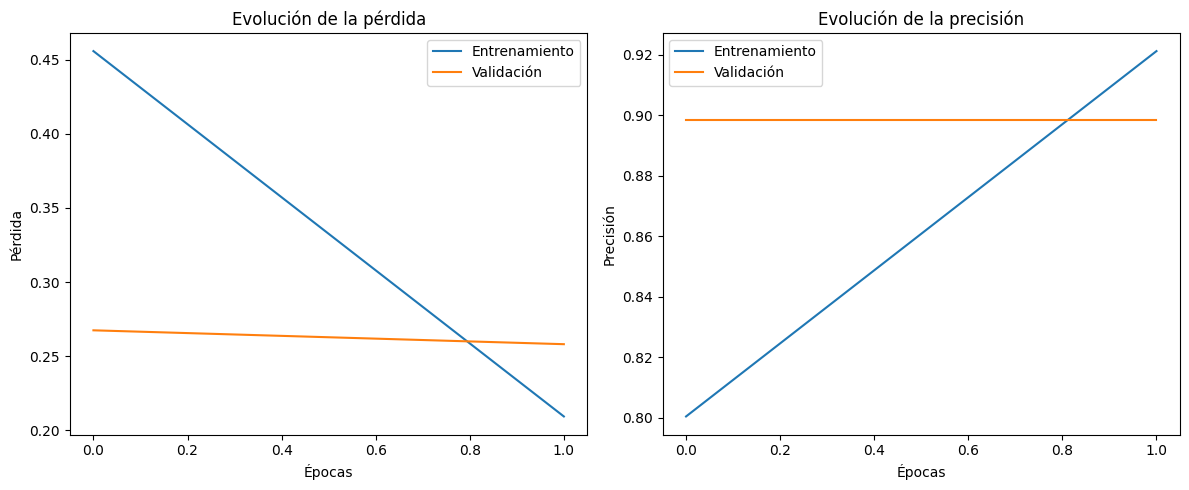

In [100]:
#definir modelo (red neuronal densa 2)
red_densa_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# compilar
red_densa_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar
history_2 = red_densa_2.fit(X_train, y_train, epochs=2, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

#Evaluar
loss, acc = red_densa_2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en test: {acc:.2f}")

#Gráficar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Evolución de la pérdida ---
axes[0].plot(history_2.history['loss'], label='Entrenamiento')
axes[0].plot(history_2.history['val_loss'], label='Validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Pérdida')
axes[0].legend()
axes[0].set_title('Evolución de la pérdida')

# --- Evolución de la precisión ---
axes[1].plot(history_2.history['accuracy'], label='Entrenamiento')
axes[1].plot(history_2.history['val_accuracy'], label='Validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Precisión')
axes[1].legend()
axes[1].set_title('Evolución de la precisión')

plt.tight_layout()
plt.show()

#**Conclusiones Finales**

**Hallazgos clave:**

El análisis de los comentarios reveló un claro predominio de emociones positivas y expresiones de apoyo hacia la labor científica del CONICET. La audiencia manifestó orgullo nacional, reconocimiento a los investigadores y entusiasmo por los hallazgos de la expedición. Esto demuestra que la transmisión generó un fuerte impacto social y un vínculo positivo entre la ciencia argentina y la comunidad digital.

**Conexión con los objetivos:**

El proyecto clasificó con éxito los comentarios en categorías de sentimiento, validando la hipótesis de que las técnicas de NLP (Procesamiento del Lenguaje Natural) y Machine Learning son herramientas útiles para medir el impacto social de la divulgación científica. La regresión logística logró una precisión general del 90%, con una precisión del 93% para la clase positiva (POS), ofreciendo un modelo base sólido y fácilmente interpretable. Por su parte, la red neuronal explorada, a pesar de su tendencia al sobreajuste inicial, aportó un enfoque más flexible y con potencial para capturar relaciones más complejas en el lenguaje.

**Limitaciones:**

Entre las principales limitaciones se encuentran el sesgo de la muestra (usuarios de YouTube), la necesidad de una limpieza exhaustiva del lenguaje coloquial y la dificultad para detectar sarcasmo o matices emocionales complejos. En el caso de la red neuronal, se evidenció cierto sobreajuste, lo que subraya la importancia de contar con más datos y ajustar técnicas de regularización para mejorar la generalización.

**Perspectivas futuras:**

Se propone extender el análisis a comentarios de otras expediciones científicas y plataformas digitales, lo que permitiría comparar percepciones y evaluar el impacto de la comunicación científica en diferentes contextos. Asimismo, la implementación de arquitecturas de deep learning más avanzadas (como GRU, LSTM o transformers) podría mejorar la capacidad de detección de matices emocionales, brindando una visión más precisa y profunda del sentimiento social frente a la ciencia.